In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"    
import tensorflow as tf
from keras.models import load_model
from load_data import load_craters, Rim, prepare_image
from sklearn.mixture import GaussianMixture

rims = load_craters()
model = load_model('./models/sigmoid.h5')

Using TensorFlow backend.


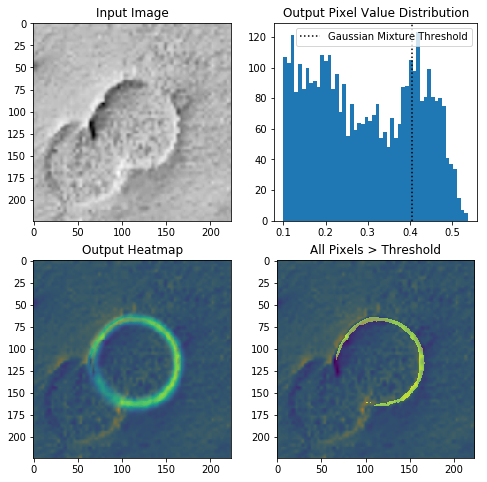

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_distro(rim, rescale=1, disp=(0, 0)):
    X, Y = prepare_image(rim, rescale=rescale, disp=disp)
    img = X[0, :, :, 0]
    Y_pred = model.predict(X)[0]
    flat = Y_pred.flatten()
    values = flat[np.argwhere(flat > .1)][:, 0]
    fig, ax_ = plt.subplots(2, 2, figsize=(8, 8));
    ax = ax_[0]
    gmm = GaussianMixture(n_components=2)
    gmm.fit(values.reshape(-1, 1))
    pred = gmm.predict(values.reshape(-1, 1))
    c0 = values[np.argwhere(pred==0)]
    c1 = values[np.argwhere(pred==1)]
    top_group = max(c0.mean(), c1.mean())
    if top_group == c0.mean():
        bum_group = c1
    else:
        bum_group = c0
    threshold = max(gmm.means_)
    ax[1].hist(values, bins=50);
    ax[1].axvline(x=threshold, linestyle='dotted', color='black', label='Gaussian Mixture Threshold')
    ax[1].legend();
    ax[1].set_title('Output Pixel Value Distribution');
    ax[0].imshow(img, cmap='Greys_r');
    ax[0].set_title('Input Image')
    ax = ax_[1]
    ax[0].imshow(img)
    ax[0].imshow(Y_pred, alpha=.5)
    ax[0].set_title('Output Heatmap')
    ax[1].imshow(img)
    ax[1].imshow(np.where(Y_pred > threshold, 1, 0), alpha=.5)
    ax[1].set_title('All Pixels > Threshold')
    plt.show()
    
plot_distro(rims[387], rescale=.75)

In [106]:
gmm.means_

array([[0.44460454],
       [0.21009812]])

In [39]:
from sklearn.cluster import KMeans
gmm = GaussianMixture(n_components=2, covariance_type='tied')
gmm.fit(values.reshape(-1, 1))
pred = gmm.predict(values.reshape(-1, 1))
c0 = values[np.argwhere(pred==0)]
c1 = values[np.argwhere(pred==1)]
len(c0)

1520

In [56]:
len(c0)

1309

In [25]:
len(values)

2819

In [20]:
flat[0]

5.044462e-13